In [90]:
!pip install mlflow

     ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
     ---------------------------------------- 0.2/24.7 MB 3.1 MB/s eta 0:00:09
      --------------------------------------- 0.3/24.7 MB 3.5 MB/s eta 0:00:07
      --------------------------------------- 0.4/24.7 MB 2.7 MB/s eta 0:00:10
     - -------------------------------------- 0.7/24.7 MB 3.8 MB/s eta 0:00:07
     - -------------------------------------- 0.8/24.7 MB 3.9 MB/s eta 0:00:07
     - -------------------------------------- 1.1/24.7 MB 3.9 MB/s eta 0:00:07
     - -------------------------------------- 1.2/24.7 MB 3.5 MB/s eta 0:00:07
     -- ------------------------------------- 1.5/24.7 MB 3.9 MB/s eta 0:00:06
     -- ------------------------------------- 1.7/24.7 MB 4.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.9/24.7 MB 4.0 MB/s eta 0:00:06
     --- ------------------------------------ 2.1/24.7 MB 4.0 MB/s eta 0:00:06
     --- ------------------------------------ 2.2/24.7 MB 4


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# Download the latest version.
kagglehub.dataset_download('andrewmvd/heart-failure-clinical-data')

100%|████████████████████████████████████████████████████████████████████████████| 3.97k/3.97k [00:00<00:00, 4.22MB/s]

Extracting files...


'C:\\Users\\zidny\\.cache\\kagglehub\\datasets\\andrewmvd\\heart-failure-clinical-data\\versions\\1'

In [12]:
# Load a DataFrame with a specific version of a CSV
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "andrewmvd/heart-failure-clinical-data/versions/1",
    "heart_failure_clinical_records_dataset.csv",
)

Download already complete (12239 bytes).


In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


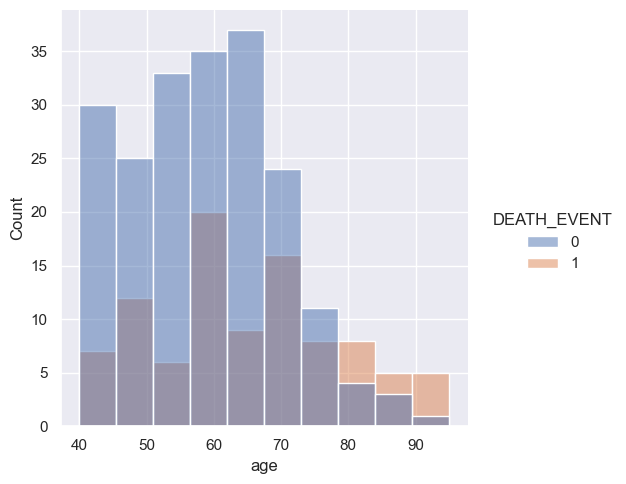

In [22]:
sns.displot(df, x='age', hue='DEATH_EVENT')

In [27]:
X = df.drop('DEATH_EVENT', axis=1)

In [29]:
y = df['DEATH_EVENT']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y
)

## Logistic Regression

In [64]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

In [65]:
X_scaled = scaler.transform(X_train)
X_minmax_scaled = min_max_scaler.transform(X_train)

In [87]:
logreg = LogisticRegression(random_state=7, max_iter=1000, solver='newton-cg')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\zidny\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\zidny\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [88]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[43,  5],
       [ 9, 18]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.90      0.86        48
   with diabetes       0.78      0.67      0.72        27

        accuracy                           0.81        75
       macro avg       0.80      0.78      0.79        75
    weighted avg       0.81      0.81      0.81        75

